___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
#@title
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [9]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [10]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [11]:
df.shape

(569, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [14]:
df.Cancer.value_counts()

1    357
0    212
Name: Cancer, dtype: int64

<AxesSubplot:xlabel='Cancer', ylabel='count'>

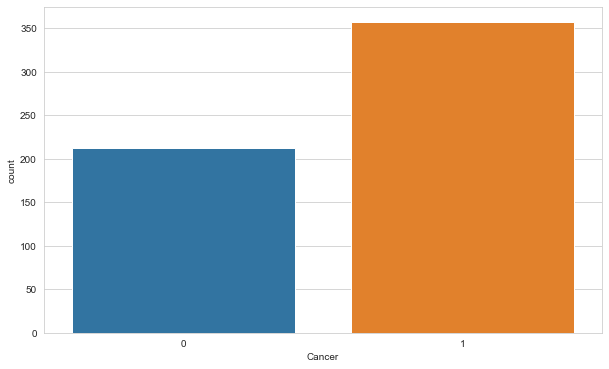

In [15]:
sns.countplot(df["Cancer"])

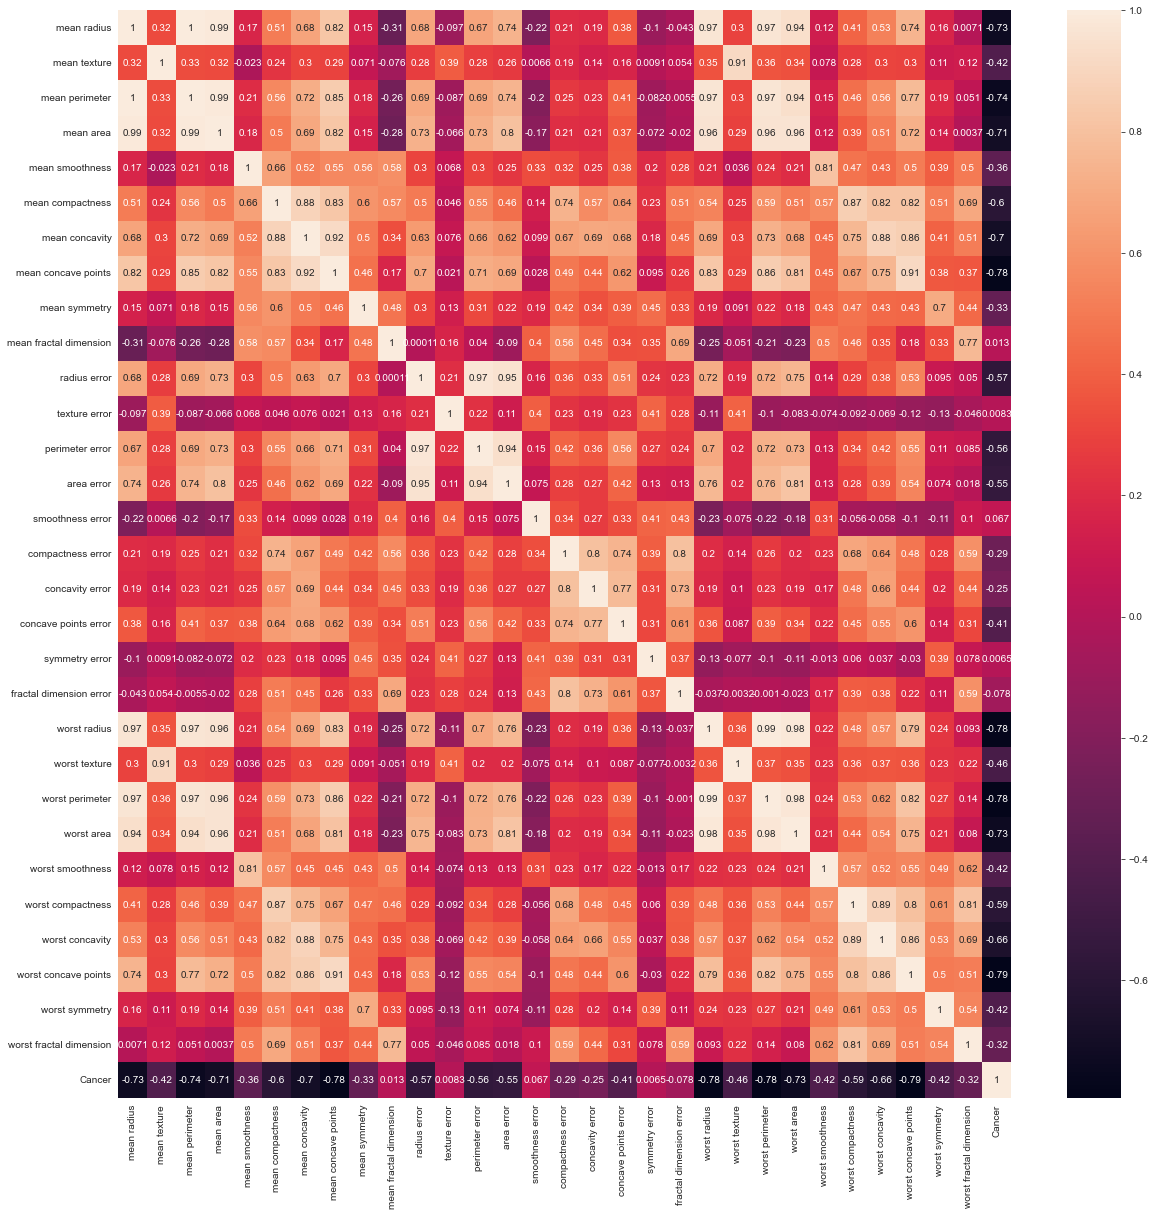

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [17]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [18]:
df=df.drop(drop_list, axis=1)

In [19]:
df.shape

(569, 25)

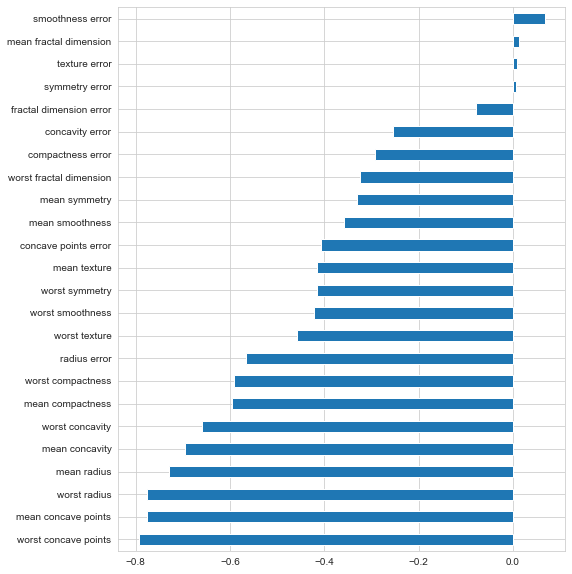

In [20]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
X = df.drop('Cancer', axis=1)
y = df['Cancer'].values

In [23]:
seed = 42

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [28]:
tf.__version__

'2.8.0'

In [29]:
X_train.shape

(512, 24)

In [30]:
X_test.shape

(57, 24)

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 1s 15ms/step - loss: 0.7177 - accuracy: 0.3870 - val_loss: 0.6714 - val_accuracy: 0.6731
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.6783 - val_loss: 0.6239 - val_accuracy: 0.8846
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6176 - accuracy: 0.8109 - val_loss: 0.5760 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5744 - accuracy: 0.8435 - val_loss: 0.5411 - val_accuracy: 0.8654
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5300 - accuracy: 0.8696 - val_loss: 0.4991 - val_accuracy: 0.8462
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4841 - accuracy: 0.8696 - val_loss: 0.4351 - val_accuracy: 0.9231
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.8804 - val_loss: 0.3918 - val_accuracy: 0.9038
Epoch

15/15 [==============================] - 0s 6ms/step - loss: 0.0732 - accuracy: 0.9739 - val_loss: 0.0514 - val_accuracy: 0.9615
Epoch 59/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0716 - accuracy: 0.9826 - val_loss: 0.0537 - val_accuracy: 0.9615
Epoch 60/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.0523 - val_accuracy: 0.9615
Epoch 61/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0719 - accuracy: 0.9804 - val_loss: 0.0575 - val_accuracy: 0.9615
Epoch 62/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0736 - accuracy: 0.9804 - val_loss: 0.0472 - val_accuracy: 0.9808
Epoch 63/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0685 - accuracy: 0.9870 - val_loss: 0.0549 - val_accuracy: 0.9615
Epoch 64/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0735 - accuracy: 0.9717 - val_loss: 0.0472 - val_accuracy: 0.9615
Epoch 65/1000

15/15 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9870 - val_loss: 0.0449 - val_accuracy: 0.9808
Epoch 116/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9870 - val_loss: 0.0406 - val_accuracy: 0.9808
Epoch 117/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9870 - val_loss: 0.0404 - val_accuracy: 0.9808
Epoch 118/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9870 - val_loss: 0.0436 - val_accuracy: 0.9808
Epoch 119/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9870 - val_loss: 0.0475 - val_accuracy: 0.9615
Epoch 120/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9870 - val_loss: 0.0418 - val_accuracy: 0.9808
Epoch 121/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9870 - val_loss: 0.0464 - val_accuracy: 0.9615
Epoch 1

Epoch 172/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0410 - accuracy: 0.9891 - val_loss: 0.0302 - val_accuracy: 0.9808
Epoch 173/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.9848 - val_loss: 0.0394 - val_accuracy: 0.9808
Epoch 174/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0371 - val_accuracy: 0.9808
Epoch 175/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9870 - val_loss: 0.0416 - val_accuracy: 0.9808
Epoch 176/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9870 - val_loss: 0.0476 - val_accuracy: 0.9808
Epoch 177/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9848 - val_loss: 0.0399 - val_accuracy: 0.9808
Epoch 178/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.9891 - val_loss: 0.0381 - val_accuracy:

Epoch 229/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9848 - val_loss: 0.0320 - val_accuracy: 0.9808
Epoch 230/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9891 - val_loss: 0.0379 - val_accuracy: 0.9808
Epoch 231/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0300 - val_accuracy: 0.9808
Epoch 232/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9891 - val_loss: 0.0296 - val_accuracy: 0.9808
Epoch 233/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9848 - val_loss: 0.0361 - val_accuracy: 0.9808
Epoch 234/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0371 - val_accuracy: 0.9808
Epoch 235/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9870 - val_loss: 0.0334 - val_accuracy:

Epoch 286/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0361 - val_accuracy: 0.9808
Epoch 287/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9870 - val_loss: 0.0336 - val_accuracy: 0.9808
Epoch 288/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9913 - val_loss: 0.0388 - val_accuracy: 0.9808
Epoch 289/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9870 - val_loss: 0.0334 - val_accuracy: 0.9808
Epoch 290/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9870 - val_loss: 0.0364 - val_accuracy: 0.9808
Epoch 291/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.0310 - val_accuracy: 0.9808
Epoch 292/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9891 - val_loss: 0.0354 - val_accuracy:

Epoch 343/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9870 - val_loss: 0.0299 - val_accuracy: 0.9808
Epoch 344/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9891 - val_loss: 0.0409 - val_accuracy: 0.9808
Epoch 345/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0419 - val_accuracy: 0.9808
Epoch 346/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.9870 - val_loss: 0.0296 - val_accuracy: 0.9808
Epoch 347/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 0.9891 - val_loss: 0.0387 - val_accuracy: 0.9808
Epoch 348/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9848 - val_loss: 0.0290 - val_accuracy: 0.9808
Epoch 349/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9870 - val_loss: 0.0415 - val_accuracy:

Epoch 400/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.9891 - val_loss: 0.0337 - val_accuracy: 0.9808
Epoch 401/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0333 - val_accuracy: 0.9808
Epoch 402/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0341 - val_accuracy: 0.9808
Epoch 403/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.0418 - val_accuracy: 0.9808
Epoch 404/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9891 - val_loss: 0.0296 - val_accuracy: 0.9808
Epoch 405/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9870 - val_loss: 0.0520 - val_accuracy: 0.9808
Epoch 406/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9891 - val_loss: 0.0309 - val_accuracy:

Epoch 457/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9913 - val_loss: 0.0348 - val_accuracy: 0.9808
Epoch 458/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9891 - val_loss: 0.0328 - val_accuracy: 0.9808
Epoch 459/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9870 - val_loss: 0.0350 - val_accuracy: 0.9808
Epoch 460/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.0342 - val_accuracy: 0.9808
Epoch 461/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9935 - val_loss: 0.0392 - val_accuracy: 0.9808
Epoch 462/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9891 - val_loss: 0.0344 - val_accuracy: 0.9808
Epoch 463/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9891 - val_loss: 0.0391 - val_accuracy:

Epoch 514/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9913 - val_loss: 0.0403 - val_accuracy: 0.9808
Epoch 515/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9913 - val_loss: 0.0367 - val_accuracy: 0.9808
Epoch 516/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9891 - val_loss: 0.0445 - val_accuracy: 0.9808
Epoch 517/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9848 - val_loss: 0.0362 - val_accuracy: 0.9808
Epoch 518/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9913 - val_loss: 0.0450 - val_accuracy: 0.9808
Epoch 519/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9891 - val_loss: 0.0380 - val_accuracy: 0.9808
Epoch 520/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9891 - val_loss: 0.0369 - val_accuracy:

Epoch 571/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9913 - val_loss: 0.0423 - val_accuracy: 0.9808
Epoch 572/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9913 - val_loss: 0.0404 - val_accuracy: 0.9615
Epoch 573/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9870 - val_loss: 0.0449 - val_accuracy: 0.9808
Epoch 574/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0436 - val_accuracy: 0.9808
Epoch 575/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9913 - val_loss: 0.0462 - val_accuracy: 0.9808
Epoch 576/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9891 - val_loss: 0.0417 - val_accuracy: 0.9808
Epoch 577/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9913 - val_loss: 0.0473 - val_accuracy:

Epoch 628/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9913 - val_loss: 0.0441 - val_accuracy: 0.9615
Epoch 629/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9957 - val_loss: 0.0506 - val_accuracy: 0.9808
Epoch 630/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9891 - val_loss: 0.0445 - val_accuracy: 0.9615
Epoch 631/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9848 - val_loss: 0.0658 - val_accuracy: 0.9808
Epoch 632/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9891 - val_loss: 0.0450 - val_accuracy: 0.9615
Epoch 633/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9891 - val_loss: 0.0584 - val_accuracy: 0.9808
Epoch 634/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9848 - val_loss: 0.0457 - val_accuracy:

Epoch 685/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9913 - val_loss: 0.0503 - val_accuracy: 0.9615
Epoch 686/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9913 - val_loss: 0.0505 - val_accuracy: 0.9615
Epoch 687/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9957 - val_loss: 0.0509 - val_accuracy: 0.9615
Epoch 688/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9913 - val_loss: 0.0506 - val_accuracy: 0.9615
Epoch 689/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9935 - val_loss: 0.0496 - val_accuracy: 0.9615
Epoch 690/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9913 - val_loss: 0.0521 - val_accuracy: 0.9615
Epoch 691/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9957 - val_loss: 0.0500 - val_accuracy:

Epoch 742/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0559 - val_accuracy: 0.9615
Epoch 743/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9978 - val_loss: 0.0564 - val_accuracy: 0.9615
Epoch 744/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 0.0480 - val_accuracy: 0.9615
Epoch 745/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0541 - val_accuracy: 0.9615
Epoch 746/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9957 - val_loss: 0.0538 - val_accuracy: 0.9615
Epoch 747/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9935 - val_loss: 0.0554 - val_accuracy: 0.9615
Epoch 748/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0547 - val_accuracy:

Epoch 799/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9957 - val_loss: 0.0603 - val_accuracy: 0.9615
Epoch 800/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9891 - val_loss: 0.0685 - val_accuracy: 0.9808
Epoch 801/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9891 - val_loss: 0.0585 - val_accuracy: 0.9615
Epoch 802/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9935 - val_loss: 0.0522 - val_accuracy: 0.9615
Epoch 803/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0531 - val_accuracy: 0.9615
Epoch 804/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9935 - val_loss: 0.0521 - val_accuracy: 0.9615
Epoch 805/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0548 - val_accuracy:

Epoch 856/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.0512 - val_accuracy: 0.9615
Epoch 857/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9978 - val_loss: 0.0523 - val_accuracy: 0.9615
Epoch 858/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9957 - val_loss: 0.0523 - val_accuracy: 0.9615
Epoch 859/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9978 - val_loss: 0.0527 - val_accuracy: 0.9615
Epoch 860/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0496 - val_accuracy: 0.9615
Epoch 861/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0524 - val_accuracy: 0.9615
Epoch 862/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0519 - val_accuracy:

Epoch 913/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9978 - val_loss: 0.0509 - val_accuracy: 0.9615
Epoch 914/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9978 - val_loss: 0.0567 - val_accuracy: 0.9615
Epoch 915/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.0482 - val_accuracy: 0.9615
Epoch 916/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9935 - val_loss: 0.0500 - val_accuracy: 0.9615
Epoch 917/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9978 - val_loss: 0.0514 - val_accuracy: 0.9615
Epoch 918/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9978 - val_loss: 0.0490 - val_accuracy: 0.9615
Epoch 919/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.0532 - val_accuracy:

Epoch 970/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 0.0520 - val_accuracy: 0.9615
Epoch 971/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9957 - val_loss: 0.0553 - val_accuracy: 0.9615
Epoch 972/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.0582 - val_accuracy: 0.9615
Epoch 973/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9978 - val_loss: 0.0508 - val_accuracy: 0.9615
Epoch 974/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9935 - val_loss: 0.0562 - val_accuracy: 0.9615
Epoch 975/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9957 - val_loss: 0.0550 - val_accuracy: 0.9615
Epoch 976/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9978 - val_loss: 0.0591 - val_accuracy:

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                750       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.718,0.387,0.671,0.673
1,0.664,0.678,0.624,0.885
2,0.618,0.811,0.576,0.942
3,0.574,0.843,0.541,0.865
4,0.530,0.870,0.499,0.846


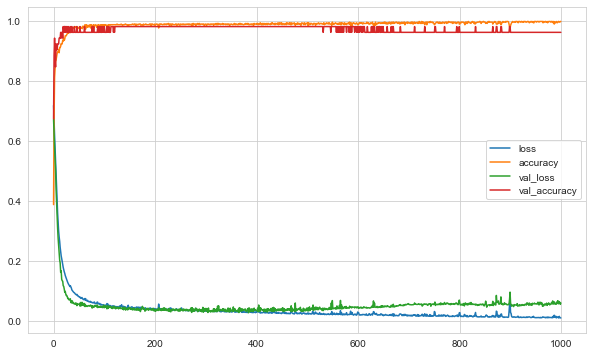

In [35]:
loss_df.plot();

In [36]:
model.evaluate(X_test, y_test, verbose=0)

[0.2861264944076538, 0.9122806787490845]

In [37]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.2861264944076538
accuracy :  0.9122806787490845


In [38]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.94      0.92      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



### EarlyStopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [42]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 12ms/step - loss: 0.7177 - accuracy: 0.3870 - val_loss: 0.6714 - val_accuracy: 0.6731
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.6783 - val_loss: 0.6239 - val_accuracy: 0.8846
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.8109 - val_loss: 0.5760 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.8435 - val_loss: 0.5411 - val_accuracy: 0.8654
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.8696 - val_loss: 0.4991 - val_accuracy: 0.8462
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.8696 - val_loss: 0.4351 - val_accuracy: 0.9231
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.8804 - val_loss: 0.3918 - val_accuracy: 0.9038
Epoch

15/15 [==============================] - 0s 4ms/step - loss: 0.0732 - accuracy: 0.9739 - val_loss: 0.0514 - val_accuracy: 0.9615
Epoch 59/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0716 - accuracy: 0.9826 - val_loss: 0.0537 - val_accuracy: 0.9615
Epoch 60/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.0523 - val_accuracy: 0.9615
Epoch 61/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9804 - val_loss: 0.0575 - val_accuracy: 0.9615
Epoch 62/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0736 - accuracy: 0.9804 - val_loss: 0.0472 - val_accuracy: 0.9808
Epoch 63/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9870 - val_loss: 0.0549 - val_accuracy: 0.9615
Epoch 64/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9717 - val_loss: 0.0472 - val_accuracy: 0.9615
Epoch 65/1000

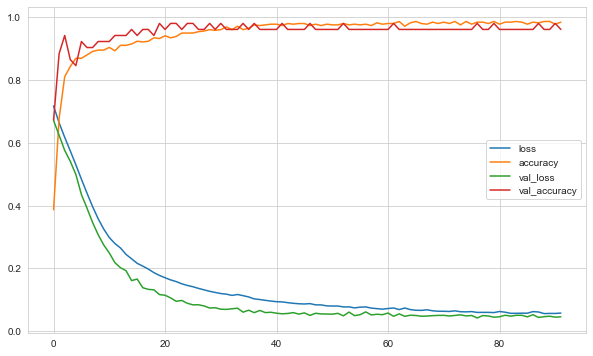

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.10533837229013443
accuracy :  0.9649122953414917


In [46]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### learning_rate

In [47]:
from tensorflow.keras.optimizers import Adam

In [48]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [49]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [50]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 16ms/step - loss: 0.6342 - accuracy: 0.7239 - val_loss: 0.5276 - val_accuracy: 0.8269
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.8826 - val_loss: 0.3451 - val_accuracy: 0.8654
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.2938 - accuracy: 0.9000 - val_loss: 0.1818 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.2162 - accuracy: 0.9152 - val_loss: 0.1047 - val_accuracy: 1.0000
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.1884 - accuracy: 0.9152 - val_loss: 0.0827 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1625 - accuracy: 0.9283 - val_loss: 0.0802 - val_accuracy: 0.9808
Epoch 7/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.1362 - accuracy: 0.9457 - val_loss: 0.0889 - val_accuracy: 0.9615
Epoch

<AxesSubplot:>

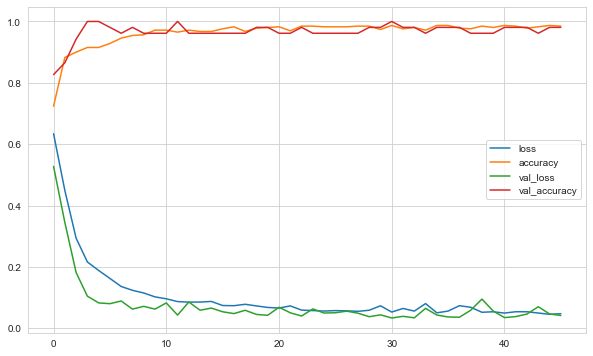

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [52]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.11213766038417816
accuracy :  0.9473684430122375


In [53]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [54]:
from tensorflow.keras.layers import Dropout

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [56]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
15/15 [==============================] - 1s 12ms/step - loss: 0.7456 - accuracy: 0.4543 - val_loss: 0.6882 - val_accuracy: 0.5192
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.7121 - accuracy: 0.4891 - val_loss: 0.6632 - val_accuracy: 0.7692
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5848 - val_loss: 0.6408 - val_accuracy: 0.8269
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6567 - accuracy: 0.6522 - val_loss: 0.6197 - val_accuracy: 0.8269
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.6826 - val_loss: 0.6078 - val_accuracy: 0.8269
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.7130 - val_loss: 0.5679 - val_accuracy: 0.8654
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5954 - accuracy: 0.7326 - val_loss: 0.5461 - val_accuracy: 0.8846
Epoch

15/15 [==============================] - 0s 7ms/step - loss: 0.1544 - accuracy: 0.9543 - val_loss: 0.0570 - val_accuracy: 0.9808
Epoch 59/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.1713 - accuracy: 0.9457 - val_loss: 0.0511 - val_accuracy: 0.9808
Epoch 60/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.1457 - accuracy: 0.9435 - val_loss: 0.0503 - val_accuracy: 0.9808
Epoch 61/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.1587 - accuracy: 0.9478 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 62/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.1443 - accuracy: 0.9543 - val_loss: 0.0483 - val_accuracy: 0.9808
Epoch 63/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.1675 - accuracy: 0.9304 - val_loss: 0.0459 - val_accuracy: 0.9808
Epoch 64/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.9435 - val_loss: 0.0507 - val_accuracy: 0.9808
Epoch 65/1000

15/15 [==============================] - 0s 3ms/step - loss: 0.1149 - accuracy: 0.9696 - val_loss: 0.0454 - val_accuracy: 0.9615
Epoch 116/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.9652 - val_loss: 0.0347 - val_accuracy: 0.9808
Epoch 117/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9696 - val_loss: 0.0436 - val_accuracy: 0.9808
Epoch 118/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.1132 - accuracy: 0.9543 - val_loss: 0.0309 - val_accuracy: 0.9808
Epoch 119/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0770 - accuracy: 0.9739 - val_loss: 0.0574 - val_accuracy: 0.9615
Epoch 120/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9761 - val_loss: 0.0404 - val_accuracy: 0.9808
Epoch 121/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.9826 - val_loss: 0.0321 - val_accuracy: 0.9808
Epoch 1

Epoch 172/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9826 - val_loss: 0.0224 - val_accuracy: 0.9808
Epoch 173/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9848 - val_loss: 0.0237 - val_accuracy: 0.9808
Epoch 174/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9870 - val_loss: 0.0279 - val_accuracy: 0.9808
Epoch 175/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9783 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 176/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.9804 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 177/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0817 - accuracy: 0.9783 - val_loss: 0.0270 - val_accuracy: 0.9808
Epoch 178/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9783 - val_loss: 0.0279 - val_accuracy:

Epoch 229/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0794 - accuracy: 0.9739 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 230/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0464 - accuracy: 0.9826 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 231/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0811 - accuracy: 0.9674 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 232/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.9761 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 233/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9826 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 234/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0873 - accuracy: 0.9674 - val_loss: 0.0255 - val_accuracy: 0.9808
Epoch 235/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0683 - accuracy: 0.9826 - val_loss: 0.0134 - val_accuracy:

Epoch 286/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9870 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 287/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9913 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 288/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0659 - accuracy: 0.9804 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 289/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9717 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 290/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9804 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 291/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.9783 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 292/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9804 - val_loss: 0.0103 - val_accuracy:

Epoch 343/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 344/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9848 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 345/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9804 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 346/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9783 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 347/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9804 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 348/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9804 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 349/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9804 - val_loss: 0.0121 - val_accuracy:

Epoch 400/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9783 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 401/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9913 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 402/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.9783 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 403/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9826 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 404/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 405/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9848 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 406/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0029 - val_accuracy:

Epoch 457/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9826 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 458/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 459/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9826 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 460/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9848 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 461/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9870 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 462/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9891 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 463/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0530 - accuracy: 0.9761 - val_loss: 0.0031 - val_accuracy:

Epoch 514/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9848 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 515/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9870 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 516/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9891 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 517/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9848 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 518/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9891 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 519/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9783 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 520/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9848 - val_loss: 0.0027 - val_accuracy:

Epoch 571/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9870 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 572/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 573/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9826 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 574/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9848 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 575/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9935 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 576/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9783 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 577/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9848 - val_loss: 0.0034 - val_accuracy:

Epoch 628/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9870 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 629/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9913 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 630/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9848 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 631/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0468 - accuracy: 0.9826 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 632/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9870 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 633/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9870 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 634/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9913 - val_loss: 0.0068 - val_accuracy:

Epoch 685/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9891 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 686/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9913 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 687/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9957 - val_loss: 8.7858e-04 - val_accuracy: 1.0000
Epoch 688/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9913 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 689/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9891 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 690/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9848 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 691/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9891 - val_loss: 8.0019e-04 - val_a

15/15 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9870 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 742/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9935 - val_loss: 8.4368e-04 - val_accuracy: 1.0000
Epoch 743/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 6.1908e-04 - val_accuracy: 1.0000
Epoch 744/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9891 - val_loss: 6.8897e-04 - val_accuracy: 1.0000
Epoch 745/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9978 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 746/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9870 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 747/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9957 - val_loss: 9.6257e-04 - val_accuracy

15/15 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9848 - val_loss: 9.6537e-04 - val_accuracy: 1.0000
Epoch 798/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.9848 - val_loss: 6.7887e-04 - val_accuracy: 1.0000
Epoch 799/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9826 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 800/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9913 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 801/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9804 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 802/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9913 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 803/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9913 - val_loss: 9.0468e-04 - val_accuracy: 1.

15/15 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 6.6261e-04 - val_accuracy: 1.0000
Epoch 854/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 855/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9826 - val_loss: 9.7269e-04 - val_accuracy: 1.0000
Epoch 856/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9891 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 857/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 858/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 859/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9978 - val_loss: 8.9822e-04 - val_accuracy: 1.

Epoch 909/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9848 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 910/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9891 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 911/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9891 - val_loss: 6.4942e-04 - val_accuracy: 1.0000
Epoch 912/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 913/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9870 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 914/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9891 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 915/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9913 - val_loss: 0.0018 - val_accur

15/15 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9870 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 966/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9957 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 967/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9870 - val_loss: 6.6558e-04 - val_accuracy: 1.0000
Epoch 968/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9870 - val_loss: 7.3255e-04 - val_accuracy: 1.0000
Epoch 969/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0301 - accuracy: 0.9870 - val_loss: 8.3217e-04 - val_accuracy: 1.0000
Epoch 970/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9935 - val_loss: 6.0690e-04 - val_accuracy: 1.0000
Epoch 971/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 3.6174e-04 - val_accu

<AxesSubplot:>

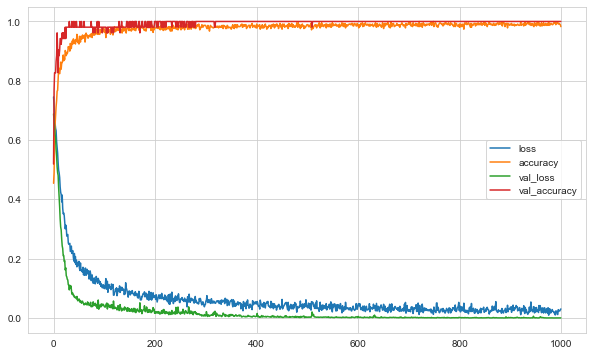

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.1841099113225937
accuracy :  0.9649122953414917


In [59]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [60]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [61]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [62]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

,test_accuracy,test_precision,test_recall,test_f1
1,0.962,0.968,0.968,0.968
2,1.000,1.000,1.000,1.000
3,0.980,0.972,1.000,0.986
4,1.000,1.000,1.000,1.000
5,0.902,0.892,0.971,0.930
6,0.961,0.971,0.971,0.971
7,0.980,0.971,1.000,0.985
8,1.000,1.000,1.000,1.000
9,1.000,1.000,1.000,1.000
10,0.961,0.926,1.000,0.962


In [63]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.975,0.031
pre,0.970,0.036
rec,0.991,0.015
f1,0.980,0.023


## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [64]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [65]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [66]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [67]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
15/15 [==============================] - 1s 18ms/step - loss: 0.6704 - accuracy: 0.6391 - val_loss: 0.5944 - val_accuracy: 0.8462
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.5470 - accuracy: 0.8630 - val_loss: 0.4768 - val_accuracy: 0.8462
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.4280 - accuracy: 0.8739 - val_loss: 0.3287 - val_accuracy: 0.9231
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.9000 - val_loss: 0.2489 - val_accuracy: 0.9038
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.9065 - val_loss: 0.1725 - val_accuracy: 0.9615
Epoch 6/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.9087 - val_loss: 0.1452 - val_accuracy: 0.9423
Epoch 7/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1818 - accuracy

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002101E03F508>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [68]:
grid_model.best_score_

0.9745475113122172

In [69]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [70]:
#grid_model.cv_results_

In [71]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.961,0.023,12,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
1,0.955,0.038,14,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
2,0.431,0.088,23,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.967,0.032,10,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.975,0.023,1,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
5,0.969,0.020,7,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
6,0.549,0.121,20,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.971,0.031,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.969,0.024,6,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
9,0.963,0.028,11,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

### for keras models

In [72]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

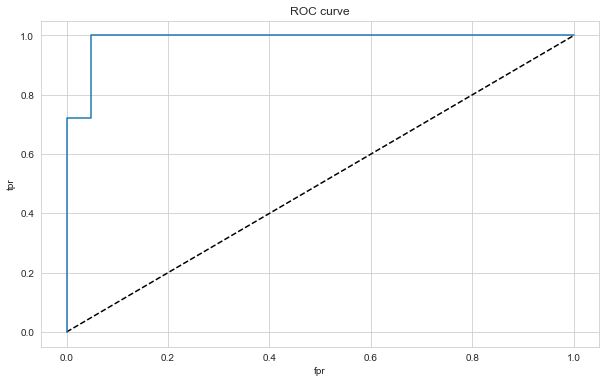

In [73]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [74]:
roc_auc_score(y_test, y_pred_proba)

0.9867724867724869

### for gridsearchcv model

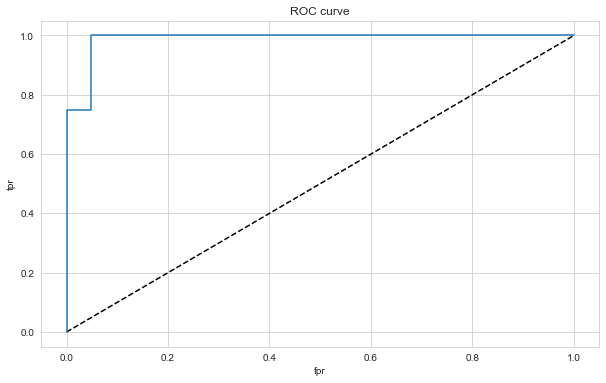

In [75]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [76]:
roc_auc_score(y_test, y_pred_proba)

0.988095238095238

## Saving Final Model and Scaler

In [77]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [78]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [79]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [80]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 25ms/step - loss: 0.7302 - accuracy: 0.3770 - val_loss: 0.7193 - val_accuracy: 0.3509
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6959 - accuracy: 0.4414 - val_loss: 0.6886 - val_accuracy: 0.4561
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6665 - accuracy: 0.6270 - val_loss: 0.6567 - val_accuracy: 0.6140
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6381 - accuracy: 0.7598 - val_loss: 0.6295 - val_accuracy: 0.7544
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6125 - accuracy: 0.7969 - val_loss: 0.6049 - val_accuracy: 0.7719
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.5863 - accuracy: 0.8457 - val_loss: 0.5786 - val_accuracy: 0.8421
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.5605 - accuracy: 0.8691 - val_loss: 0.5511 - val_accuracy: 0.8596
Epoch 8/1000
8/8 [=

8/8 [==============================] - 0s 6ms/step - loss: 0.0898 - accuracy: 0.9785 - val_loss: 0.1191 - val_accuracy: 0.9474
Epoch 60/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0868 - accuracy: 0.9824 - val_loss: 0.1033 - val_accuracy: 0.9649
Epoch 61/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0863 - accuracy: 0.9746 - val_loss: 0.1058 - val_accuracy: 0.9649
Epoch 62/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0849 - accuracy: 0.9785 - val_loss: 0.1088 - val_accuracy: 0.9474
Epoch 63/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0852 - accuracy: 0.9805 - val_loss: 0.1122 - val_accuracy: 0.9474
Epoch 64/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0829 - accuracy: 0.9766 - val_loss: 0.0982 - val_accuracy: 0.9649
Epoch 65/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0832 - accuracy: 0.9785 - val_loss: 0.1144 - val_accuracy: 0.9474
Epoch 66/1000
8/8 [========

<AxesSubplot:>

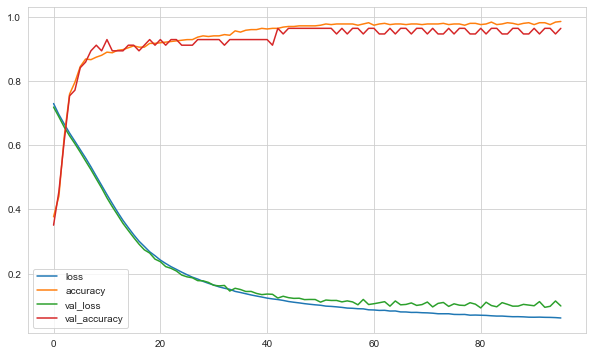

In [81]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [82]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.09878845512866974
accuracy :  0.9649122953414917


In [83]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [84]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [85]:
from tensorflow.keras.models import load_model

In [86]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [87]:
single_patient = df.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [88]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.52103744, 0.0226581 , 0.68000973, 0.7920373 , 0.70313964,
        0.73111332, 0.68636364, 0.60551811, 0.35614702, 0.12046941,
        0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
        0.18304244, 0.62077552, 0.14152452, 0.61828432, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [89]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

array([[0]])

In [90]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___